In [77]:
! pip install tensorflow



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## CNN images
- https://github.com/AdTekDev/EmT.DS/raw/main/EmT%20Test%2001/Set_A.zip
- https://www.tensorflow.org/tutorials/images/classification

In [78]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import pathlib

import tensorflow as tf


from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


In [ ]:
data_dir = pathlib.Path(r"D:\chuyen de cong nghe\Set_X")
data_dir

WindowsPath('D:/chuyen de cong nghe/Set_A')

In [80]:
image_count = len(list(data_dir.glob('Train/*/*.jpg')))
print(image_count)

182


In [81]:
list(data_dir.glob('Train/*/*.jpg'))

[WindowsPath('D:/chuyen de cong nghe/Set_A/Train/0 - Hoa sen/Hoa sen 001.jpg'),
 WindowsPath('D:/chuyen de cong nghe/Set_A/Train/0 - Hoa sen/Hoa sen 003.jpg'),
 WindowsPath('D:/chuyen de cong nghe/Set_A/Train/0 - Hoa sen/Hoa sen 004.jpg'),
 WindowsPath('D:/chuyen de cong nghe/Set_A/Train/0 - Hoa sen/Hoa sen 005.jpg'),
 WindowsPath('D:/chuyen de cong nghe/Set_A/Train/0 - Hoa sen/Hoa sen 007.jpg'),
 WindowsPath('D:/chuyen de cong nghe/Set_A/Train/0 - Hoa sen/Hoa sen 008.jpg'),
 WindowsPath('D:/chuyen de cong nghe/Set_A/Train/0 - Hoa sen/Hoa sen 009.jpg'),
 WindowsPath('D:/chuyen de cong nghe/Set_A/Train/0 - Hoa sen/Hoa sen 010.jpg'),
 WindowsPath('D:/chuyen de cong nghe/Set_A/Train/1 - Hoa hong/HoaHong-001.jpg'),
 WindowsPath('D:/chuyen de cong nghe/Set_A/Train/1 - Hoa hong/HoaHong-002.jpg'),
 WindowsPath('D:/chuyen de cong nghe/Set_A/Train/1 - Hoa hong/HoaHong-003.jpg'),
 WindowsPath('D:/chuyen de cong nghe/Set_A/Train/1 - Hoa hong/HoaHong-004.jpg'),
 WindowsPath('D:/chuyen de cong nghe

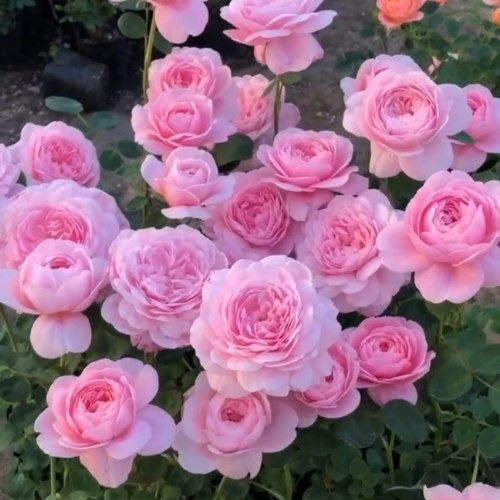

In [82]:
flowers = list(data_dir.glob('Train/*/*'))
PIL.Image.open(str(flowers[10]))

In [83]:
str(flowers[0])

'D:\\chuyen de cong nghe\\Set_A\\Train\\0 - Hoa sen\\Hoa sen 001.jpg'

In [84]:
batch_size = 8
img_height = 180
img_width = 180

In [85]:
# trainPath = C:/Users/tunn7/.keras/datasets/Set_A/Train

In [86]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir.joinpath("Train") ,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 184 files belonging to 20 classes.
Using 148 files for training.


In [87]:
class_names = train_ds.class_names
class_names

['0 - Hoa sen',
 '1 - Hoa hong',
 '10 - Hoa dam but',
 '11 - Hoa huong duong',
 '12 - Hong tu cau',
 '13 - Hoa oi',
 '14 - Hoa Tram Oi',
 '15 - Lan hac vy',
 '16 - Hoa ban',
 '17 - Hoa atiso',
 '18 - Tung tuyet mai',
 '19 - Hoa Phao Bong',
 '2 - Hoa nhai',
 '3 - Hoa mai',
 '4 - Hoa anh dao',
 '5 - Hoa man',
 '6 - Hoa do quyen',
 '7 - Hoa sao nhai',
 '8 - Hoa thuoc duoc',
 '9 - Hoa sung']

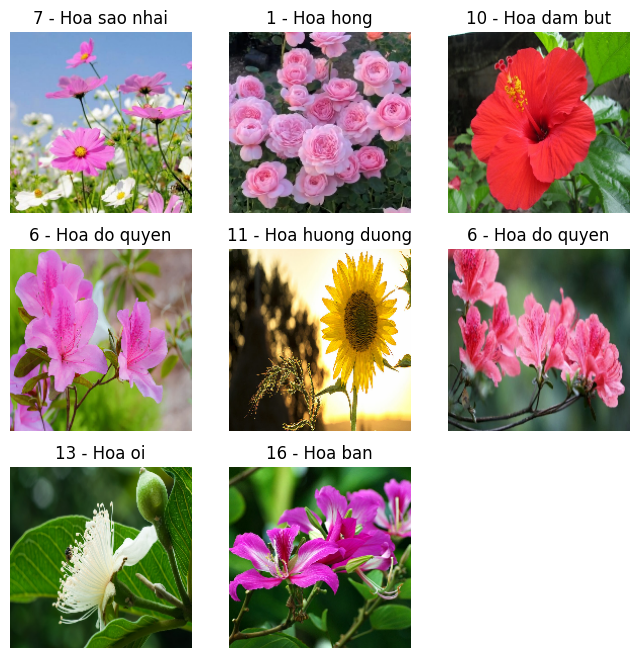

In [88]:
plt.figure(figsize=(8, 8))
for images, labels in train_ds.take(1):
  for i in range(8):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

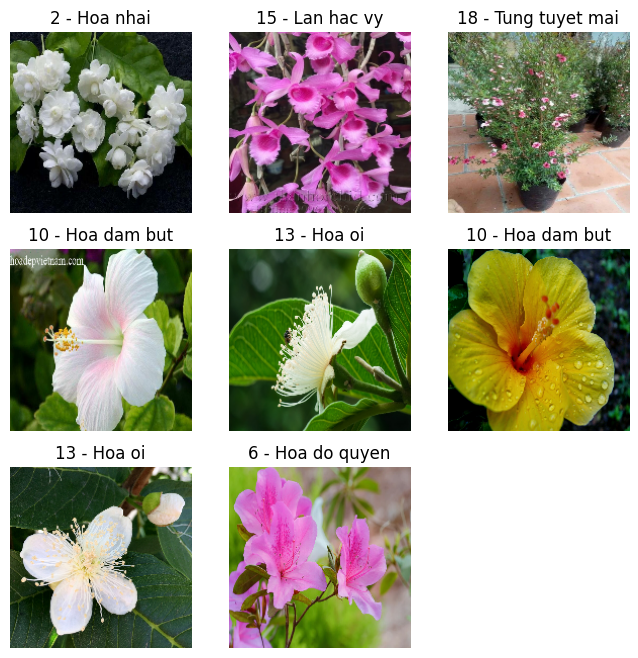

In [89]:
plt.figure(figsize=(8, 8))
for images, labels in train_ds.take(1):
    for i in range(8):
        ax = plt.subplot(3, 3, i + 1)
        try:
            # Chuyển đổi hình ảnh thành uint8 để hiển thị
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(class_names[labels[i]])
            plt.axis("off")
        except tf.errors.InvalidArgumentError as e:
            print(f"Lỗi khi xử lý hình ảnh tại vị trí {i}: {e}")
            plt.title("Invalid Image")
            plt.axis("off")

In [90]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(8, 180, 180, 3)
(8,)


In [91]:
normalization_layer = layers.Rescaling(1./255)

In [92]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))

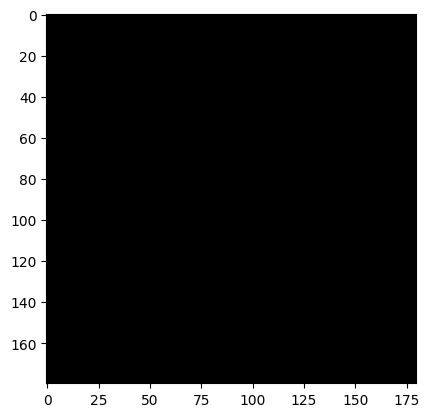

In [93]:
plt.imshow(image_batch[0].numpy().astype("uint8"))
plt.show()

In [94]:
image_batch.shape, labels_batch.shape

(TensorShape([8, 180, 180, 3]), TensorShape([8]))

In [95]:
## model

num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [96]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [97]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_7 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 20)             │         2,580 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,991,220 (15.23 MB)

 Trainable params: 3,991,220 (15.23 MB)

 Non-trainable params: 0 (0.00 B)

In [98]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir.joinpath("Train"),
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 184 files belonging to 20 classes.
Using 36 files for validation.


In [99]:
epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
 1/19 ━━━━━━━━━━━━━━━━━━━━ 45s 3s/step - accuracy: 0.0000e+00 - loss: 3.0189

InvalidArgumentError: Graph execution error:

Detected at node decode_image/DecodeImage defined at (most recent call last):
<stack traces unavailable>
Unknown image file format. One of JPEG, PNG, GIF, BMP required.
	 [[{{node decode_image/DecodeImage}}]]
	 [[IteratorGetNext]] [Op:__inference_one_step_on_iterator_13300]

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
## Predict



In [ ]:
testlist = list(data_dir.glob('Test/*.jpg'))
print(testlist[0])

In [ ]:

i = 6
sunflower_path = testlist[i]
print(testlist[i], "\n")
for sunflower_path in testlist:
    img = tf.keras.utils.load_img(
        sunflower_path, target_size=(img_height, img_width)
    )
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])

    print(
        "This image most likely belongs to {} with a {:.2f} percent confidence."
        .format(class_names[np.argmax(score)], 100 * np.max(score))
    )
    print(class_names[np.argmax(score)],100 * np.max(score),sunflower_path)

In [ ]:
import pandas as pd  # Import pandas để làm việc với file CSV

# Tạo danh sách để lưu kết quả
results = []

i = 6
sunflower_path = testlist[i]
print(testlist[i], "\n")
for sunflower_path in testlist:
    img = tf.keras.utils.load_img(
        sunflower_path, target_size=(img_height, img_width)
    )
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Tạo batch
    
    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])
    predicted_class = class_names[np.argmax(score)]
    confidence = 100 * np.max(score)

    print(
        "This image most likely belongs to {} with a {:.2f} percent confidence."
        .format(predicted_class, confidence)
    )
    print(predicted_class, confidence, sunflower_path)
    
    # Thêm kết quả vào danh sách
    results.append({
        "Image Path": sunflower_path,
        "Predicted Class": predicted_class,
        "Confidence (%)": confidence
    })

# Ghi kết quả vào file CSV
df = pd.DataFrame(results)
df.to_csv("predictions.csv", index=False)
print("Kết quả đã được lưu vào file predictions.csv.")
